In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [32]:
DataDir=r"Downloads\train-20230309T150602Z-001\train"

In [33]:
CATEGORIES = ["NORMAL", "PNEUMONIA"]

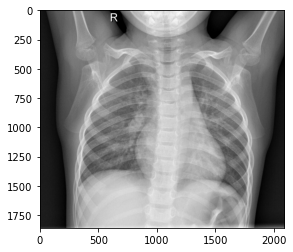

In [34]:
for i in CATEGORIES:
    path=os.path.join(DataDir,i)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

In [35]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization,Activation
from keras.preprocessing.image import ImageDataGenerator

In [36]:
img_size=100

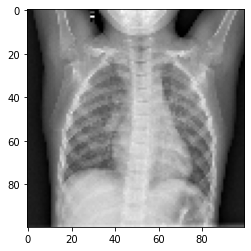

In [37]:
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [38]:
training_data=[]
def create_training_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [39]:
create_training_data()

In [40]:
print(len(training_data))

5226


In [41]:
import random
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample)

[array([[  8,  34,  66, ...,  44,  19,   7],
       [  8,  27,  62, ...,  41,  19,   5],
       [  8,  22,  62, ...,  37,  13,   0],
       ...,
       [  0,   0,   0, ..., 229, 252, 253],
       [  0,   0,   0, ...,   4,   3,  74],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8), 1]
[array([[11, 11, 11, ...,  8,  3, 37],
       [11, 11, 10, ..., 15, 40, 10],
       [11, 11, 10, ..., 12,  9, 10],
       ...,
       [ 9, 17, 15, ..., 11, 12, 13],
       [13,  9, 13, ..., 11, 12, 14],
       [10, 17, 27, ..., 11, 12, 14]], dtype=uint8), 1]
[array([[39, 40, 40, ..., 23, 24, 25],
       [41, 41, 42, ..., 24, 23, 24],
       [43, 46, 46, ..., 24, 23, 24],
       ...,
       [27, 24, 24, ..., 34, 28, 30],
       [26, 24, 24, ..., 32, 30, 31],
       [20, 24, 24, ..., 30, 30, 27]], dtype=uint8), 1]
[array([[  1,   1,   1, ...,   2, 247,  35],
       [  1,   1,   0, ...,   5,   2,  10],
       [ 27,   0,   0, ...,   8,  61,  31],
       ...,
       [ 10,   9,  19, ...,   1,   1,   1]

In [42]:
X=[]
y=[]

In [43]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [44]:
print(X[0].reshape(-1,img_size,img_size,1))

[[[[  8]
   [ 34]
   [ 66]
   ...
   [ 44]
   [ 19]
   [  7]]

  [[  8]
   [ 27]
   [ 62]
   ...
   [ 41]
   [ 19]
   [  5]]

  [[  8]
   [ 22]
   [ 62]
   ...
   [ 37]
   [ 13]
   [  0]]

  ...

  [[  0]
   [  0]
   [  0]
   ...
   [229]
   [252]
   [253]]

  [[  0]
   [  0]
   [  0]
   ...
   [  4]
   [  3]
   [ 74]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]]


In [45]:
y = np.array(y)

In [46]:
X = np.array(X).reshape(-1,img_size,img_size,1)

In [47]:
validation_data=[]
DataDir_val= r"Downloads\test-20230309T161308Z-001\test"

In [48]:
def create_validating_data():
    for i in CATEGORIES:

        path=os.path.join(DataDir_val,i)
        class_num=CATEGORIES.index(i)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array,(img_size,img_size))
                validation_data.append([new_array,class_num])
            
            except Exception as e:
                pass

In [49]:
create_validating_data()
print(len(validation_data))

624


In [50]:
import random
random.shuffle(validation_data)
for sample in validation_data[:10]:
    print(sample)

[array([[168, 146, 140, ..., 221, 231, 236],
       [169, 146, 136, ..., 223, 231, 236],
       [180, 137, 116, ..., 222, 230, 235],
       ...,
       [ 18,  18,  16, ...,  20,  22,  23],
       [ 18,  18,  16, ...,  20,  22,  23],
       [ 18,  17,  17, ...,  20,  22,  23]], dtype=uint8), 1]
[array([[182, 174, 158, ...,  63,  81,  78],
       [182, 174, 154, ...,  41,  41, 105],
       [175, 166, 154, ...,  73,  67,  91],
       ...,
       [ 26,  27,  25, ...,  29,  29,  29],
       [ 26,  27,  25, ...,  29,  29,  29],
       [ 26,  28,  28, ...,  29,  29,  29]], dtype=uint8), 1]
[array([[183, 175, 183, ...,  59,  76, 209],
       [190, 186, 182, ...,  60, 178,  67],
       [190, 187, 181, ...,  62, 215,  60],
       ...,
       [ 16,  18,  12, ...,  14,  15,  15],
       [ 16,  16,  12, ...,  14,  15,  15],
       [ 15,  15,  12, ...,  14,  15,  15]], dtype=uint8), 1]
[array([[ 43,  45,  46, ..., 187, 184, 184],
       [ 42,  44,  47, ..., 191, 180, 186],
       [ 48,  54,  57, ...

In [51]:
X_val=[]
y_val=[]

In [52]:
for features,label in validation_data:
    X_val.append(features)
    y_val.append(label)

In [53]:
y_val = np.array(y_val)
X_val=np.array(X_val).reshape(-1,img_size,img_size,1)

In [54]:
X = X/255.0
x_val = X_val/255.0

In [55]:
model= Sequential()

model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
activation_4 (Activation)    (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
activation_5 (Activation)    (None, 47, 47, 128)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)      

In [57]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [58]:
model.fit(X,y,batch_size=4,epochs=10,validation_data=(x_val, y_val))

Epoch 1/10
1307/1307 [==============================] - 70s 53ms/step - loss: 0.3330 - accuracy: 0.8860 - val_loss: 0.6677 - val_accuracy: 0.7756
Epoch 2/10
1307/1307 [==============================] - 69s 53ms/step - loss: 0.1435 - accuracy: 0.9487 - val_loss: 0.5139 - val_accuracy: 0.8189
Epoch 3/10
1307/1307 [==============================] - 68s 52ms/step - loss: 0.1201 - accuracy: 0.9573 - val_loss: 0.8344 - val_accuracy: 0.7308
Epoch 4/10
1307/1307 [==============================] - 67s 51ms/step - loss: 0.1006 - accuracy: 0.9596 - val_loss: 1.0367 - val_accuracy: 0.7564
Epoch 5/10
1307/1307 [==============================] - 69s 53ms/step - loss: 0.0849 - accuracy: 0.9665 - val_loss: 1.3389 - val_accuracy: 0.6971
Epoch 6/10
1307/1307 [==============================] - 69s 53ms/step - loss: 0.0857 - accuracy: 0.9705 - val_loss: 1.1156 - val_accuracy: 0.7660
Epoch 7/10
1307/1307 [==============================] - 69s 53ms/step - loss: 0.0767 - accuracy: 0.9723 - val_loss: 0.9433 -

In [61]:
def prepare(image):
    img_size=100
    
    img=tf.keras.preprocessing.image.load_img(image, color_mode='grayscale', target_size=(img_size,img_size))
    new_array=tf.keras.preprocessing.image.img_to_array(img)

    return new_array.reshape(-1,img_size,img_size,1)

In [91]:
image = r'Downloads\test-20230309T161308Z-001/test/PNEUMONIA/person174_bacteria_832.jpeg'

In [92]:
prediction=model.predict([prepare(image)/255.0])
print(prediction)
print(round(prediction[0][0]))
print(CATEGORIES[int(round(prediction[0][0]))])

[[0.9999951]]
1
PNEUMONIA


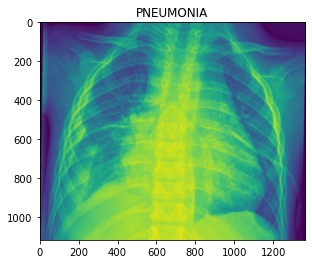

In [101]:
img=mpimg.imread(image)
imgplot=plt.imshow(img)
plt.title(CATEGORIES[int(round(prediction[0][0]))])
plt.show()